<a href="https://colab.research.google.com/github/kikiru328/Study_notebook/blob/main/Study_code/Deeplearning_framework/keras/keras03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 신경망의 구조

    * 신경망의 훈련에는 다음 요소가 관련되어 있다.
    1. 네트워크 (또는 모델)을 구성하는 층
    2. 입력 데이터와 그에 상응하는 타깃
    3. 학습에 사용할 피드백 신호를 정의하는 손실 함수
    4. 학습 진행 방식을 결정하는 옵티마이저

### 층 : 딥러닝의 구성 단위

In [ ]:
# 층은 하나 이상의 텐서를 입력으로 받아 하나 이상의 텐서를 출력하는 데이터 처리 모듈.
# 대부분의 경우 가중치라는 층의 상태를 가지며, 가중치는 확률적 경사 하강법에 의해 학습되는 하나 이상의 텐서이다.
# 층마다 적절한 텐서 포맷ㅎ과 데이터 처리 방식이 다름.
# ex) (samples, features) 크기의 2D 텐서가 저장된 간단한 벡터 데이터 == 완전 연결 층 / 빌집 연결 층 에 의해 처리됨.
#     (samples, timesteps, features) 크기의 3D 텐서로 저장된 시퀀스 데이터는 보통 LSTM과 같은 순환층
#     4D 텐서로 저장되어 있는 이미지 데이터는 일반적으로 2D 합성곱 층에 의해 처리됨. (Conv2D)
# 케라스는 호환 가능한 층들을 엮어 데이터 변환 파이프라인을 구성함으로써 딥러닝 모델을 구축함.
# 층 호환성은 각 층이 특정 크기의 입력 텐서만 받고 특정 크기의 출력 텐서를 반환함.

from tensorflow.keras import layers
layer = layers.Dense( 32, input_shape=(784,) ) # 32개의 유닛으로 된 밀집 층을 의미.

# 첫 번째 차원이 784인 2D 텐서만 입력으로 받는 층. ( 배치 차원인 0번째 축은 지정하지 않아 어떤 배치 크기도 입력 가능)
# 이 층은 첫 번째 차원 크기가 32로 변환된 텐서를 출력할 것.
# 따라서 이 층에는 32차원의 벡터를 입력으로 받는 하위 층이 연결되어야 함.

from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add( layers.Dense( 32, input_shape = (784,) )
model.add( layers.Dense( 10 ) )

# 두 번째 층에는 input_shape 매개변수를 지정하지 않음 --> 앞선 층의 출력 크기를 입력 크기로 자동 채택

### 모델 : 층의 네트워크

In [ ]:
# 띱러닝 모델은 층으로 만든 비순환 유향 그래프. 
# 하나의 입력을 하나의 출력으로 매핑하는 층을 순서대로 쌓음.
# 네트워크 구조 == 가설 공간. ( 가능성 있는 공간을 사전에 정의하고 피드백 신호의 도움을 받아 입력 데이터에 대한 유용한 변환을 찾는 것. )
# 가설 공간을 입력 데이터에서 출력 데이터로 매핑하는 일련의 특정 텐서 == 네트워크 구조

### 손실 함수와 옵티마이저 : 학습 과정을 조절하는 열쇠

In [ ]:
# 네트워크 구조를 정의하면 두 가지를 선택해야된다.
# 손실함수 ( 목적 함수 ) : 훈련하는 동안 최소화 될 값.
# 옵티마이저 : 손실 함수를 기반으로 네트워크가 어떻게 업데이트될지 결정. 특정 종류의 확률적 경사 하강법을 구현.
# 문제에 맞는 목적 함수를 선택해야 됨.
# 2개의 클래스 분류 : 이진 크로스엔트로피 ( binary crossentropy )
# 다중 클래스 분류 : 범주형 크로스엔트로피 ( categorical crossentropy )
# 회귀 문제 : 평균 제곱 오차 ( Mean Squard Error )
# 시퀀스 학습 문제 : CTC ( connection Temporal Classification )

# 케라스란

    - 동일한 코드로 cpu 와 gpu 에서 사용이 가능
    - 사용하기 쉬운 api, 딥러닝 모델의 프로토타입을 빠르게 생성 가능
    - 컴퓨터 비전을 위한 합성곱 신경망, 시퀀스 처리를 위한 순환 신경망을 지원. --> 자유롭게 조합하여 사용 가능
    - 다중 입력이나 다중 출력 모델, 층의 공유, 모델 공유 등 어떤 네트워크 구조도 만들 수 있음. ==> GAN 

### 케라스를 사용한 개발

In [ ]:
from typing import Sequence
# 모델을 정의하는 방법은 두가지.
# 1. Sequential 클래스 ( 가장 자주 사용하는 구조인 층을 순서대로 쌓아 올린 네트워크 )
# 2. Functional API ( 완전히 임의의 구조를 만들 수 있는 비순환 유향 그래프 )

# Sequential
from tensorflow.keras import models, layers
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape = (784,)))
model.add(layers.Dense(10, activation='softmax'))

# API
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)
model = models.Model(inputs= input_tensor, outputs=output_tensor)
# API를 사용하면 모델이 처리할 데이터 텐서를 만들고 마치 함수처럼 이 텐서에 층을 적용함.


# 컴파일 단계에서 학습 과정이 설정된다.
# 여기에서 모델이 사용할 옵티마이저와 손실 함수, 훈련 하는 동안 필요한 측정 지표를 지정.
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate = 0.001),
              loss = 'mse',
              metrics=['accuracy'])

# 마지막으로 입력 데이터의 넘파이 배열을
# 모델의 fit() 메서드에 전달함으로써 학습 과정이 진행된다.
model.fit(input_tensor, target_tensor, batch_size=128, epoch=10)

# NLP ( 영화 리뷰 분류 : binary crossentropy )

### IMDB

    = Train 25000
    - test 25000
    - 50% 긍정 / 50% 부정

In [ ]:
# IMDB 데이터셋 로드
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data( num_words = 10000 )
# Train_labels / test_labels > negative : 0, positive : 1
print(train_data[0])
print(train_labels[0])
#num_words = 10000개로 index 0~9999
print(max( [max(sequence) for sequence in train_data]))

word_index = imdb.get_word_index() # 단어와 정수 인덱스를 매핑
reverse_word_index = dict( [(value,key) for (key, value) in word_index.items()]) # 정수 인덱스와 단어를 매핑 ( flip )
decoded_review = ' '.join( [reverse_word_index.get(i-3, '?') for i in train_data[0]]) # 리뷰를 디코딩. 0,1,2 는 '패딩', '문서시작', '사전에 없음' 을 위한 인덱스 따라서 0,1,2 총 3을 제거

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1
9999
1654784/1641221 [==============================] - 0s

### Data 준비

In [ ]:
# 신경망에 숫자 리스트를 주입할 수 없음. 리스트를 텐서로 변환해야함.
# 같은 길이가 되도록 리스트에 패딩을 추가. samples, sequence_length 크기의 정수 텐서로 변환.
# 그 다음 이 정수 텐서를 다룰 수 있는 층읋 신경망의 첫 번째 층으로 사용함. (Embedding)
# 리스트를 one-hot encoding하여 0과 1의 벡터로 변환. 시퀀스 [3, 5]를 인덱스 3, 5의 위치는 1이고 그 외는 모두 0인 10,000차원의 벡터로 각각 변환.
# 그 다음 부동 소수 벡터 데이터를 다룰 수 있는 Dense층을 신경망의 첫 번째 층으로 사용함.

# int sequence to binary matrix
import numpy as np
def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros( (len(sequences), dimension) ) # 크기가 (len(sequences), dimension), 모든 원소가 0 (np.zeros)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # results[i]에서 특정 인덱스의 위치를 1로 만듦
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

print(x_train[0])

# 레이블 변환
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

[0. 1. 1. ... 0. 0. 0.]


### 신경망 모델 만들기

    - 입력 데이터가 벡터, 레이블이 이진 >> 가장 쉬움
    - 이런 문제에 잘 작동하는 네트워크 : acivation = 'relu' + 완전 연결층   # Relu : 음수를 0으로 만듬
        Dense(16, activation='relu')
    - Dense층의 16은 은닉 유닛. 하나의 은닉 유닛은 층이 나타내는 표현 공간에서 하나의 차원이 됨.
    - 16개의 은닉 유닛이 있다는 것은 가중치 행렬 W의 크기가 (input_dimension, 16)이라는 뜻.
    - 입력 데이터와 W를 점곱하면 입력 데이턱라 16차원으로 표현된 공간으로 투영. ( 그리고 편향 벡터 b를 더하고 relu 연산을 적용 )
    - 은닉 유닛을 증가 ( 표현 공간을 더 고차원) > 신경망이 더욱 복잡한 표현을 할 수 있지만 무거워짐.

In [ ]:
# Dense 층을 쌓을때는 2가지 중요도 1. 얼마나 많은 층을 쌓을 것인지/ 얼마나 많은 은닉 유닛을 둘 것 인지?
# relu : 음수를 0으로 만듬. sigmoid :출력 값을 확률로 계산

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
# model.compile(optimizer = 'rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer = optimizers.RMSprop(learning_rate = 0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])


### 훈련 검증

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000: ]

# 모델 훈련
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 38ms/step - loss: 0.4980 - acc: 0.7931 - val_loss: 0.4254 - val_acc: 0.8177
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2957 - acc: 0.9031 - val_loss: 0.2973 - val_acc: 0.8891
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2175 - acc: 0.9279 - val_loss: 0.2777 - val_acc: 0.8906
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1686 - acc: 0.9461 - val_loss: 0.2903 - val_acc: 0.8836
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1389 - acc: 0.9537 - val_loss: 0.2911 - val_acc: 0.8856
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1126 - acc: 0.9664 - val_loss: 0.3025 - val_acc: 0.8858
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0925 - acc: 0.9730 - val_loss: 0.4095 - val_acc: 0.8588
Epoch 8/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0812 - a

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


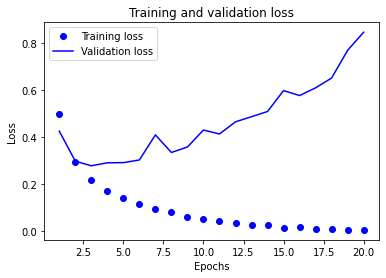

In [ ]:
# 훈련 검증 손실 그래프
history_dict = history.history
print(history_dict.keys())

from matplotlib import pyplot as plt
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) +1 )
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

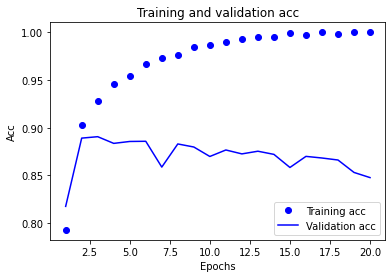

In [ ]:
plt.clf() #초기화
acc = history_dict['acc']
val_acc = history_dict['val_acc']
epochs = range(1, len(loss) +1 )
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

# 과대적합 발생

In [ ]:
# 재하습
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs = 4,
                    batch_size = 512,
                    validation_data = (x_val, y_val))
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
49/49 [==============================] - 2s 23ms/step - loss: 0.4689 - acc: 0.8265 - val_loss: 0.3067 - val_acc: 0.9066
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2703 - acc: 0.9060 - val_loss: 0.2086 - val_acc: 0.9340
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2085 - acc: 0.9264 - val_loss: 0.1719 - val_acc: 0.9437
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2898 - acc: 0.8858
[0.2898241877555847, 0.8857600092887878]


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


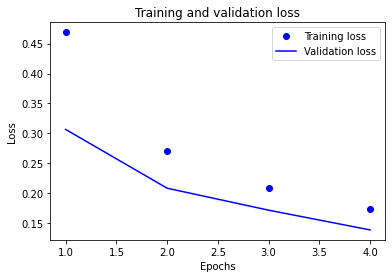

In [ ]:
# 훈련 검증 손실 그래프
history_dict = history.history
print(history_dict.keys())

from matplotlib import pyplot as plt
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) +1 )
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

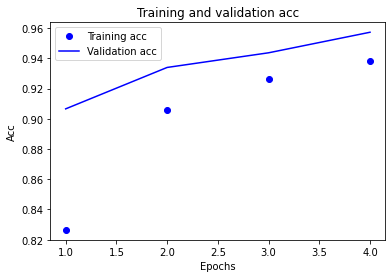

In [ ]:
plt.clf() #초기화
acc = history_dict['acc']
val_acc = history_dict['val_acc']
epochs = range(1, len(loss) +1 )
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

# 과대적합 발생

### 훈련된 모델로 새로운 데이터에 대해 예측

In [ ]:
model.predict(x_test)

array([[0.23048905],
       [0.99991596],
       [0.7433797 ],
       ...,
       [0.10103265],
       [0.06925239],
       [0.58078676]], dtype=float32)

# 정리

    - 원본 데이터를 신경망에 텥서로 주입하기 위해서는 꽤 많은 전처리가 필요함. 
    - 단어 시퀀스는 이진 벡터로 인코딩될 수 있고 다른 인코딩 방식또한 존재함.
    - 출력 클래스가 2개인 이진 분류 문제에서 네트워크는 하나의 유닛과 sigmoid 활성화 함수를 가진 Dense 층으로 끝나야됨.
    - 이 신경망의 출력은 확률을 나타내는 0과 1 사이의 스칼라.
    - 이진 분류 문제에서 이런 스칼라 시그모이드 출력에 대해 사용할 손실 함수는 binary_crossentropy.
    - rmsprop 옵티마이저는 범용적인 옵티마이저.
    - 훈련 데이터에 대해 성능이 향삼됨에 따라 신경망은 과대적합이 되기 쉬움. < 훈련 세트 이외의 데이터에서 성능을 모니터링 해야됨 >

# 뉴스 기사 분류 : 다중 분류 문제


### 로이터 데이터셋

    - 46개의 토픽이 있음. 각 토픽은 훈련 세트에 최소 10개의 샘플을 보유

In [1]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

print(len(train_data))
print(len(test_data))

8982
2246


In [2]:
# 텍스트 디코딩
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
print(train_labels[10])

3


### data 준비

In [3]:
import numpy as np
def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros( (len(sequences), dimension) ) # 크기가 (len(sequences), dimension), 모든 원소가 0 (np.zeros)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # results[i]에서 특정 인덱스의 위치를 1로 만듦
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

print(x_train[0])

# 레이블 변환
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


[0. 1. 1. ... 0. 0. 0.]


* 원-핫 인코딩


```
def to_one_hot(labels, dimension=46):
    results = np.zeros( (len(labels), dimension) )
    for i, label in enumerate(labels):
        results[i, label] = 1.
    retrun results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)    
```
        - 케라스에는 to_categorical 내장 함수가 있음


In [4]:
from tensorflow.keras.utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### 모델 구성

In [5]:
from tensorflow import keras
keras.__version__

'2.8.0'

In [6]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import activations

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer = 'rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### 훈련 검증

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000: ]

# 모델 훈련
history = model.fit(partial_x_train, partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

# 훈련 검증 손실 그래프
history_dict = history.history
print(history_dict.keys())

from matplotlib import pyplot as plt
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) +1 )
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf() #초기화
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(loss) +1 )
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

# 과대적합 발생

In [8]:
# 재하습
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation = 'softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(partial_x_train, partial_y_train,
                    epochs = 9,
                    batch_size = 512,
                    validation_data = (x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Epoch 1/9
16/16 [==============================] - 1s 25ms/step - loss: 2.6144 - accuracy: 0.5286 - val_loss: 1.7197 - val_accuracy: 0.6490
Epoch 2/9
16/16 [==============================] - 0s 13ms/step - loss: 1.4295 - accuracy: 0.7091 - val_loss: 1.3117 - val_accuracy: 0.7230
Epoch 3/9
16/16 [==============================] - 0s 12ms/step - loss: 1.0624 - accuracy: 0.7780 - val_loss: 1.1441 - val_accuracy: 0.7520
Epoch 4/9
16/16 [==============================] - 0s 12ms/step - loss: 0.8374 - accuracy: 0.8237 - val_loss: 1.0387 - val_accuracy: 0.7800
Epoch 5/9
16/16 [==============================] - 0s 12ms/step - loss: 0.6713 - accuracy: 0.8573 - val_loss: 0.9792 - val_accuracy: 0.7930
Epoch 6/9
16/16 [==============================] - 0s 13ms/step - loss: 0.5485 - accuracy: 0.8832 - val_loss: 0.9377 - val_accuracy: 0.8070
Epoch 7/9
16/16 [==============================] - 0s 12ms/step - loss: 0.4399 - accuracy: 0.9094 - val_loss: 0.9242 - val_accuracy: 0.8030
Epoch 8/9
16/16 [===